**About the data**  
**Sox17** is wild-type Sox17 and **Sox17FNV** is a Sox17 mutant with three mutations within its DNA binding domain.  
The genomic binding of Sox17 and Sox17FNV was analyzed at day 6 of the somatic cell reprogramming of fibroblasts to induced pluripotent stem cells using ChIP-seq.  
  

**About Chip-seq**  
https://en.wikipedia.org/wiki/ChIP_sequencing 
  

**About Google Colab**  
Colab notebooks allow you to combine executable code and rich text in a single document, along with images, HTML, LaTeX and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them.  
  

**About Debug**  
Google Colab connects your local browser and a cloud server, if this notebook/code crashes at some point. please try to read the error message and try to figure them out first. Or you can easily reopen this notebook and run the subblock with "\***" in front, then you can continue to run the code.  

## *** Set working directory & download necessary files & download software  
(run the following **4** code every time you re-open this notebook)

In [ ]:
# set working pathway to your own google drive doc (~ 1 min)
# if using for the first time, you be requested to grant permission to link your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')                       
# change to another non-HKU account if you get error in this step.

In [ ]:
# now you will jump into the files/ directory
import os
try:
  os.mkdir("/content/gdrive/My Drive/PB_course/files")         # change this path if necessary
except FileExistsError:
  print("directory already exist. OK to continue")
os.chdir("/content/gdrive/My Drive/PB_course/files")

# download necessary files for analysis from github
!wget -O Sox17.bed https://raw.githubusercontent.com/jasonwong-lab/HKU-Practical-Bioinformatics/main/files/Sox17.bed
!wget -O Sox17FNV.bed https://raw.githubusercontent.com/jasonwong-lab/HKU-Practical-Bioinformatics/main/files/Sox17FNV.bed 
!wget -O mm10.txt https://raw.githubusercontent.com/jasonwong-lab/HKU-Practical-Bioinformatics/main/files/mm10.txt
!wget -O mm10Refgene.bed https://raw.githubusercontent.com/jasonwong-lab/HKU-Practical-Bioinformatics/main/files/mm10Refgene.bed

In [ ]:
# install conda (~ 1 min). 
# There will be a message saying that the session has crashed but don't worry about this. This is due to the session restarting following conda installation
!pip install -q condacolab
import condacolab#
condacolab.install()

In [ ]:
# install bedtools (~ 2 min)
!conda install -c bioconda bedtools

# double check that we are in right directory
import os
os.chdir("/content/gdrive/My Drive/PB_course/files")

## Q1  
Draw a simple Venn diagram (with numbers) for the intersection
of Sox17 and Sox17FNV peaks

In [ ]:
!windowBed

In [ ]:
!windowBed -a Sox17.bed -b Sox17FNV.bed -u  -w 200| wc -l

896


In [ ]:
!windowBed -a Sox17.bed -b Sox17FNV.bed -v -w 200 | wc -l

75258


In [ ]:
!windowBed -a Sox17FNV.bed -b Sox17.bed -u -w 200| wc -l

892


In [ ]:
!windowBed -a Sox17FNV.bed -b Sox17.bed -v -w 200| wc -l

16693


Hence, we have the following diagram:  
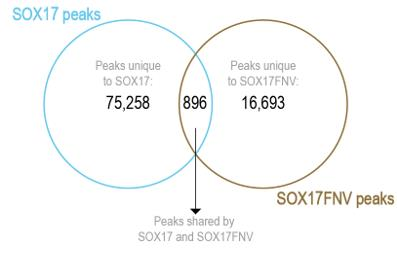

## Q2  
Are there peaks in Sox17 and Sox17FNV datasets within 10 kb of the TSS of the Sox2 gene?  

hints: There are two selection criteria: peaks within 10 kb of the TSS of the Sox2 gene.

In [ ]:
# double check that we are in right directory
import os
os.chdir("/content/gdrive/My Drive/PB_course/files")

#you might have done this in the class
!sort -k1,1 -k2,2n Sox17.bed >Sox17_sorted.bed
!sort -k1,1 -k2,2n Sox17FNV.bed >Sox17FNV_sorted.bed
!sort -k1,1 -k2,2n mm10Refgene.bed >mm10Refgene_sorted.bed

In [ ]:
!closestBed -a mm10Refgene_sorted.bed -b Sox17_sorted.bed -d | awk '$10 <10000 {print $0}' | awk '$4=="Sox2" {print $0}'
#if you meet "Error: Unable to open file mm10Refgene_sorted.bed. Exiting.", please run the code above

chr3	34650004	34650005	Sox2	chr3	34651101	34651102	Sox17day6_macs2_tl_fnv_pv_00001_peak_44880a	7.67068	1097


In [ ]:
!closestBed -a mm10Refgene_sorted.bed -b Sox17FNV_sorted.bed -d | awk '$10 <10000 {print $0}' | awk '$4=="Sox2" {print $0}'

chr3	34650004	34650005	Sox2	chr3	34654047	34654048	FNVday6_macs2_tl_fnv_pv_00001_peak_10497	68.93124	4043


##Q3  
Is there a strong peak (p-value score >50)?  

The p-value score is given in column **9**.  
The distance of the binding peak to the TSS is in column **10**.  
For the Sox17 dataset, the p-value score for the peak of interest is **7.67**.   
For the Sox17FNV dataset, the p-value score for the peak of interest is **68.93**.  
**Therefore, a strong peak was detected in the Sox17FNV dataset but not in the Sox17 dataset**.


## Q4  
Is this peak common or unique for our datasets?  
Given the different strengths and locations of the two peaks, it can be concluded that the peak with a p-value score of 68.9 is **unique** for the Sox17FNV datasets.  


## Q5  
Describe and interpret the results of the analysis.
The binding profile of the mutant Sox17FNV transcription factor protein is very different from wild type Sox17 (see Veen diagram). An example of a binding site unique to Sox17FNV is located 4043 base-pairs upstream of the transcription start site of the Sox2 gene. A genome browser plot for the binding site near Sox2 can be found in Figure 6C in this publication: 
https://www.cell.com/stem-cell-reports/fulltext/S2213-6711(18)30307-2